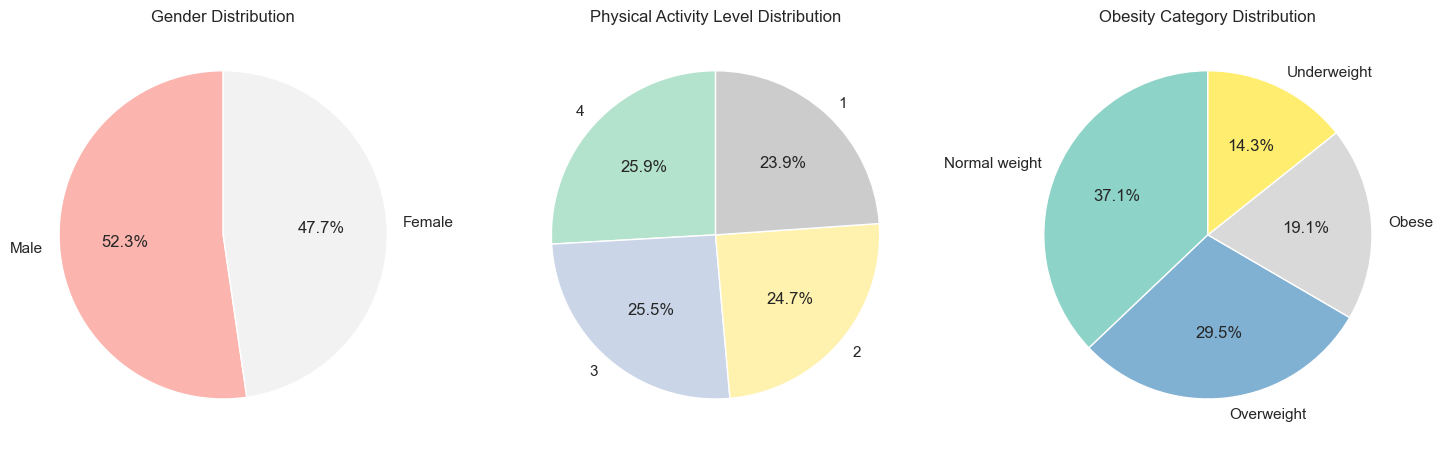

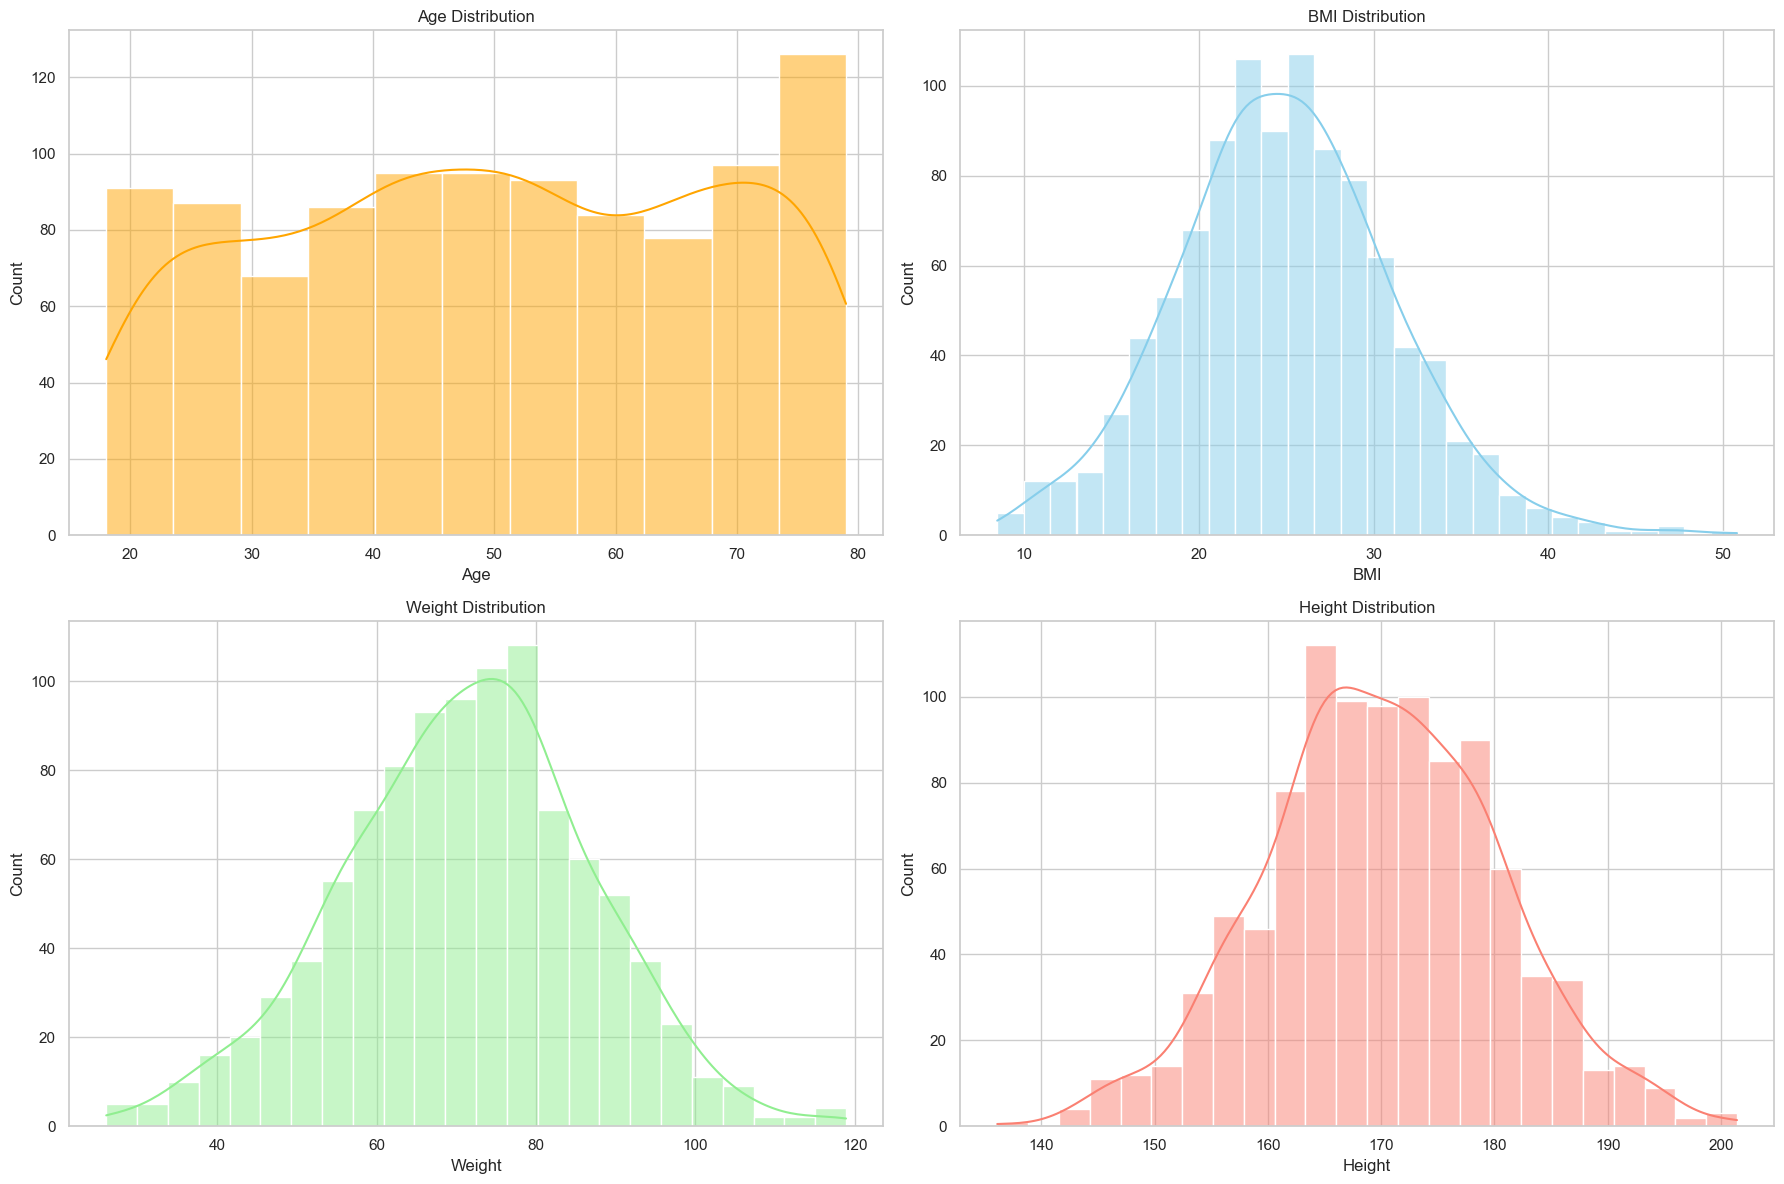

Feature Ranges:
       Age      Height      Weight        BMI  PhysicalActivityLevel
min  18.0  136.115719   26.065730   8.470572                    1.0
max  79.0  201.419670  118.907366  50.791898                    4.0

Descriptive Statistics:
                Age       Height       Weight          BMI  \
count  1000.000000  1000.000000  1000.000000  1000.000000   
mean     49.857000   170.052417    71.205769    24.888317   
std      18.114267    10.309971    15.509849     6.193912   
min      18.000000   136.115719    26.065730     8.470572   
25%      35.000000   163.514205    61.129629    20.918068   
50%      50.000000   169.801665    71.929072    24.698647   
75%      66.000000   177.353596    81.133746    28.732132   
max      79.000000   201.419670   118.907366    50.791898   

       PhysicalActivityLevel  
count            1000.000000  
mean                2.534000  
std                 1.116284  
min                 1.000000  
25%                 2.000000  
50%              

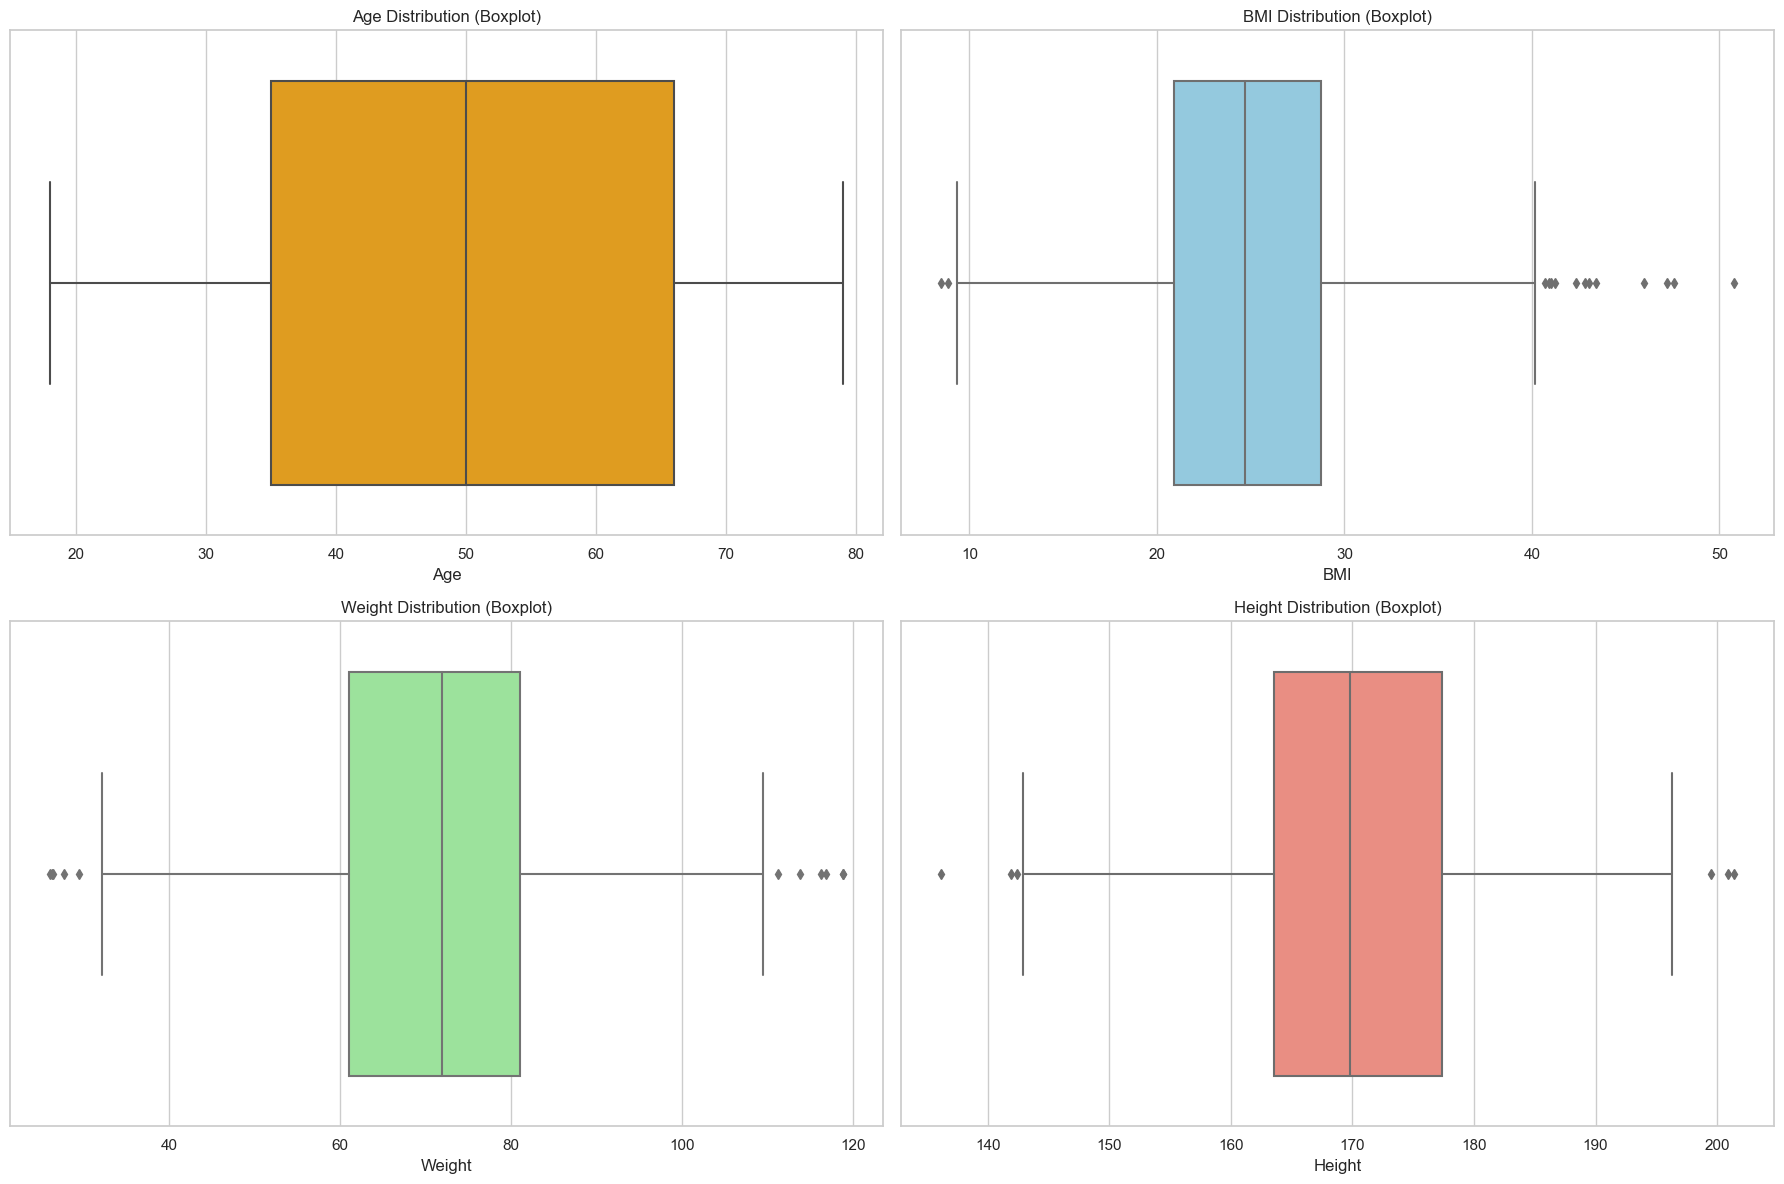

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,0.339295,1,0.341864,0.050076,-0.160970,1.313943,2
1,1.057320,1,-0.574985,1.209739,1.374115,-0.478612,3
2,-0.213033,0,-0.192164,0.111266,0.150129,1.313943,4
3,-0.986291,1,-0.154567,0.882535,0.811514,0.417665,4
4,0.560226,1,1.311635,-0.139776,-0.710797,0.417665,2


In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Load the dataset
file_path = r'C:\Users\hp\Desktop\ML\obesity_data.csv'
data = pd.read_csv(file_path)

# Displaying the range of examples for each feature
feature_ranges = data.describe().loc[['min', 'max']]

# Descriptive statistics for the quantitative measures
descriptive_stats = data.describe()

# Setting up the visual style for the plots
sns.set(style="whitegrid")

# Pie charts for categorical variables: Gender, PhysicalActivityLevel, ObesityCategory
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
data['Gender'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], startangle=90, cmap='Pastel1')
ax[0].set_title('Gender Distribution')
ax[0].set_ylabel('')

data['PhysicalActivityLevel'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1], startangle=90, cmap='Pastel2')
ax[1].set_title('Physical Activity Level Distribution')
ax[1].set_ylabel('')

data['ObesityCategory'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[2], startangle=90, cmap='Set3')
ax[2].set_title('Obesity Category Distribution')
ax[2].set_ylabel('')

# Histograms for numerical variables: Age, BMI, Weight, Height
fig, ax = plt.subplots(2, 2, figsize=(18, 12))
sns.histplot(data['Age'], kde=True, ax=ax[0, 0], color='orange')
ax[0, 0].set_title('Age Distribution')

sns.histplot(data['BMI'], kde=True, ax=ax[0, 1], color='skyblue')
ax[0, 1].set_title('BMI Distribution')

sns.histplot(data['Weight'], kde=True, ax=ax[1, 0], color='lightgreen')
ax[1, 0].set_title('Weight Distribution')

sns.histplot(data['Height'], kde=True, ax=ax[1, 1], color='salmon')
ax[1, 1].set_title('Height Distribution')

plt.tight_layout()
plt.show()

# Output the feature ranges and descriptive statistics
print("Feature Ranges:\n", feature_ranges)
print("\nDescriptive Statistics:\n", descriptive_stats)
# Boxplots for numerical variables: Age, BMI, Weight, Height
fig, ax = plt.subplots(2, 2, figsize=(18, 12))
sns.boxplot(data=data, x='Age', ax=ax[0, 0], color='orange')
ax[0, 0].set_title('Age Distribution (Boxplot)')

sns.boxplot(data=data, x='BMI', ax=ax[0, 1], color='skyblue')
ax[0, 1].set_title('BMI Distribution (Boxplot)')

sns.boxplot(data=data, x='Weight', ax=ax[1, 0], color='lightgreen')
ax[1, 0].set_title('Weight Distribution (Boxplot)')

sns.boxplot(data=data, x='Height', ax=ax[1, 1], color='salmon')
ax[1, 1].set_title('Height Distribution (Boxplot)')

plt.tight_layout()
plt.show()
################################################################
# Convert 'Gender' to numerical values (0 for female, 1 for male)
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})
# Mapping 'ObesityCategory' to numerical values
obesity_mapping = {
    'Underweight': 1,
    'Normal weight': 2,
    'Obese': 3,
    'Overweight': 4
}
data['ObesityCategory'] = data['ObesityCategory'].map(obesity_mapping)


# Columns that need to be scaled
columns_to_scale = ['Age', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel']

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply scaling to the relevant columns
data_scaled = data.copy()
data_scaled[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Display the first few rows of the scaled data
data_scaled.head()



Performance for k=1:
Training Accuracy: 1.0
Testing Accuracy: 0.84
              precision    recall  f1-score   support

           1       0.90      0.90      0.90        31
           2       0.81      0.83      0.82        72
           3       0.93      0.88      0.90        32
           4       0.80      0.80      0.80        65

    accuracy                           0.84       200
   macro avg       0.86      0.85      0.86       200
weighted avg       0.84      0.84      0.84       200

Performance for k=3:
Training Accuracy: 0.95375
Testing Accuracy: 0.845
              precision    recall  f1-score   support

           1       0.90      0.84      0.87        31
           2       0.84      0.85      0.84        72
           3       0.90      0.84      0.87        32
           4       0.81      0.85      0.83        65

    accuracy                           0.84       200
   macro avg       0.86      0.84      0.85       200
weighted avg       0.85      0.84      0.85   

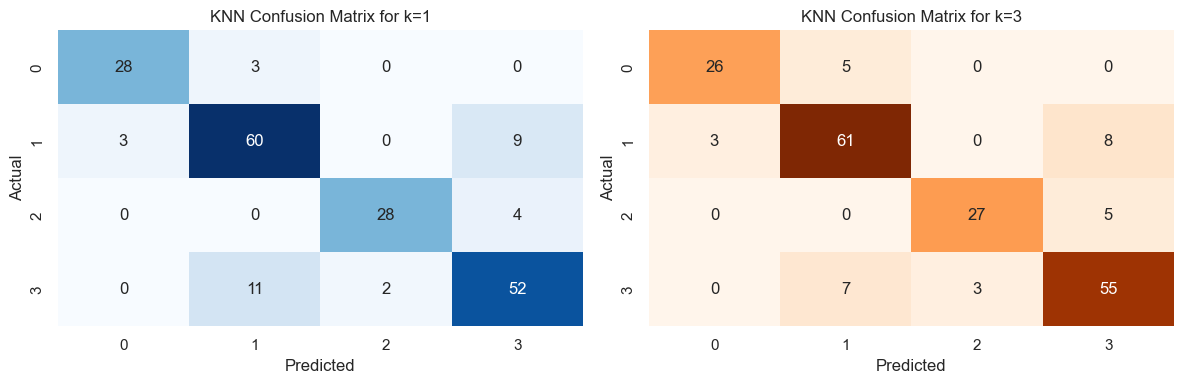

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data_scaled' is your pre-processed DataFrame with scaled features and the target variable

# Split the scaled data into training and test sets
X_scaled = data_scaled.drop('ObesityCategory', axis=1)
y = data_scaled['ObesityCategory']
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize an empty dictionary to store confusion matrices
confusion_matrices = {}

# Evaluate KNN with k=1 and k=3
plt.figure(figsize=(12, 4))
for i, k in enumerate([1, 3], start=1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    # Predictions on test set
    y_test_pred = knn.predict(X_test_scaled)
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, knn.predict(X_train_scaled))
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Print performance
    print(f"Performance for k={k}:")
    print("Training Accuracy:", train_accuracy)
    print("Testing Accuracy:", test_accuracy)
    print(classification_report(y_test, y_test_pred))
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    confusion_matrices[k] = conf_matrix

    # Plot confusion matrix
    plt.subplot(1, 2, i)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues" if i == 1 else "Oranges", cbar=False)
    plt.title(f"KNN Confusion Matrix for k={k}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()


In [92]:
X_train_scaled, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_validation, X_test_scaled, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

rf_param_grid = {'n_estimators': [10, 20, 50, 100]}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=4, scoring='accuracy')
grid_search_rf.fit(X_validation, y_validation)

# Best parameters and model for Random Forest
best_rf = grid_search_rf.best_estimator_

# Print Random Forest Accuracies for Different n_estimators
print("\nRandom Forest Accuracies for Different n_estimators:")
for n, score in zip(grid_search_rf.cv_results_['param_n_estimators'], grid_search_rf.cv_results_['mean_test_score']):
    print(f"n_estimators={n}, validation Accuracy: {score}")

# Best parameters and accuracy for Random Forest
best_rf_params = grid_search_rf.best_params_
best_rf_accuracy = grid_search_rf.best_score_
print(f"\nBest Parameters for Random Forest: {best_rf_params} with higher Accuracy ")
# SVM with hyperparameter tuning
svm_param_grid = {'C': [0.1, 1, 10, 100]}
grid_search_svm = GridSearchCV(SVC(random_state=42), svm_param_grid, cv=4, scoring='accuracy')
grid_search_svm.fit(X_validation, y_validation)
# Best parameters and model for SVM
best_svm = grid_search_svm.best_estimator_
# Print SVM Accuracies for Different C Values
print("\nSVM Accuracies for Different C Values:")
for C, score in zip(grid_search_svm.cv_results_['param_C'], grid_search_svm.cv_results_['mean_test_score']):
    print(f"C={C}, validation Accuracy: {score}")
best_svm_params = grid_search_svm.best_params_
best_svm_accuracy = grid_search_svm.best_score_
print(f"\nBest Parameters for SVM: {best_svm_params} with higher Accuracy ")

# Evaluating the best models on the test set
rf_test_accuracy = accuracy_score(y_test, best_rf.predict(X_test_scaled))
svm_test_accuracy = accuracy_score(y_test, best_svm.predict(X_test_scaled))

print("\nRandom Forest Test Set Accuracy:", rf_test_accuracy)
print("SVM Test Set Accuracy:", svm_test_accuracy)



Random Forest Accuracies for Different n_estimators:
n_estimators=10, validation Accuracy: 0.965
n_estimators=20, validation Accuracy: 0.975
n_estimators=50, validation Accuracy: 0.965
n_estimators=100, validation Accuracy: 0.97

Best Parameters for Random Forest: {'n_estimators': 20} with higher Accuracy 

SVM Accuracies for Different C Values:
C=0.1, validation Accuracy: 0.505
C=1, validation Accuracy: 0.845
C=10, validation Accuracy: 0.86
C=100, validation Accuracy: 0.845

Best Parameters for SVM: {'C': 10} with higher Accuracy 

Random Forest Test Set Accuracy: 0.99
SVM Test Set Accuracy: 0.87


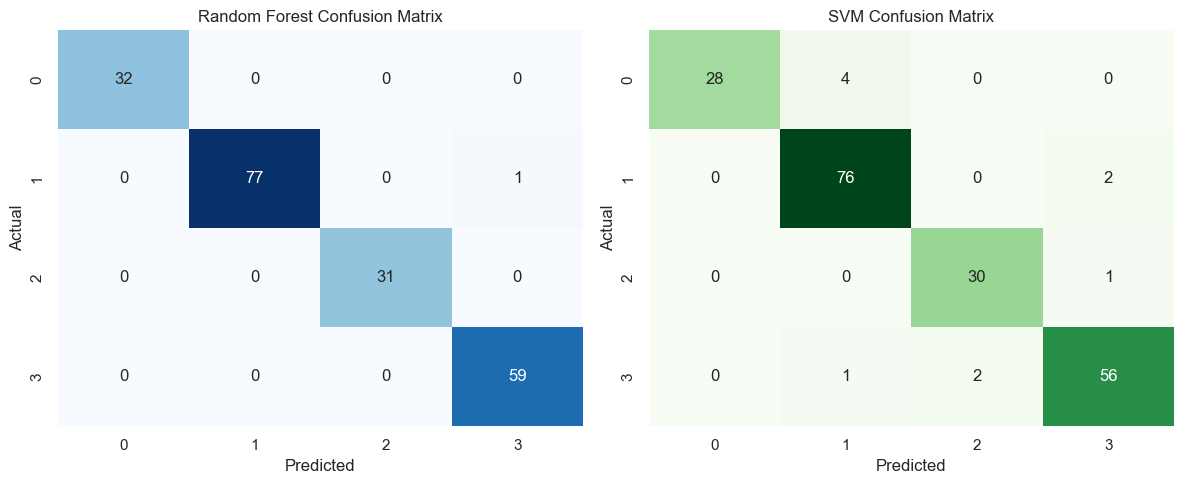

Misclassified Indices for Random Forest: [182]
Misclassified Indices for SVM: [ 20  22  29  36  53  79  97 100 102 182]
Classification Report for Random Forest:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        32
           2       1.00      0.99      0.99        78
           3       1.00      1.00      1.00        31
           4       0.98      1.00      0.99        59

    accuracy                           0.99       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      0.99      1.00       200


Classification Report for SVM:
               precision    recall  f1-score   support

           1       1.00      0.88      0.93        32
           2       0.94      0.97      0.96        78
           3       0.94      0.97      0.95        31
           4       0.95      0.95      0.95        59

    accuracy                           0.95       200
   macro avg       0.96      0.94      0.95 

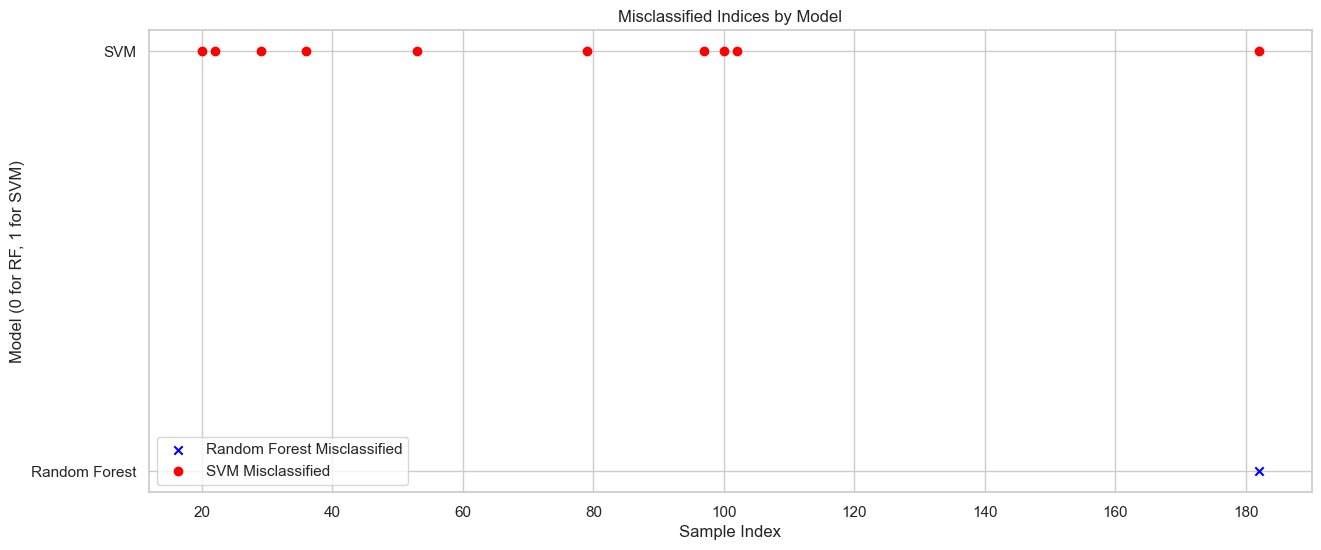

In [93]:
# Create and train Random Forest Classifier on the scaled data
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_scaled, y_train)
rf_predictions = rf_clf.predict(X_test_scaled)

# Create and train SVM Classifier on the scaled data
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train_scaled, y_train)
svm_predictions = svm_clf.predict(X_test_scaled)

# Confusion Matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_predictions)

# Confusion Matrix for SVM
svm_cm = confusion_matrix(y_test, svm_predictions)

# Plot Confusion Matrix
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(svm_cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# Misclassified Indices
rf_misclassified_indices = np.where(rf_predictions != y_test)[0]
svm_misclassified_indices = np.where(svm_predictions != y_test)[0]

print("Misclassified Indices for Random Forest:", rf_misclassified_indices)
print("Misclassified Indices for SVM:", svm_misclassified_indices)

# Classification Report
rf_classification_report = classification_report(y_test, rf_predictions)
svm_classification_report = classification_report(y_test, svm_predictions)

print("Classification Report for Random Forest:\n", rf_classification_report)
print("\nClassification Report for SVM:\n", svm_classification_report)

# Plotting the Misclassified Indices
plt.figure(figsize=(15, 6))
plt.scatter(rf_misclassified_indices, np.zeros_like(rf_misclassified_indices), color='blue', marker='x', label='Random Forest Misclassified')
plt.scatter(svm_misclassified_indices, np.ones_like(svm_misclassified_indices), color='red', marker='o', label='SVM Misclassified')
plt.xlabel('Sample Index')
plt.ylabel('Model (0 for RF, 1 for SVM)')
plt.title('Misclassified Indices by Model')
plt.yticks([0, 1], ['Random Forest', 'SVM'])
plt.legend()
plt.show()
